In [1]:
import glob
import pandas as pd
import pyarrow.parquet as pq
import pyarrow.csv as csv
import time
from datetime import date
import pyarrow.compute as pc
import matplotlib.pyplot as plt

filename = "./turnstile_parquet/turnstile_by_year.parquet"

In [2]:
table = pq.read_table(filename, filters=[("DATE", "=", date(2020, 3, 9))])
table.to_pandas()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,00:00:00,REGULAR,7403756,2512351
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,04:00:00,REGULAR,7403762,2512352
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,08:00:00,REGULAR,7403784,2512463
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,12:00:00,REGULAR,7403915,2512689
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,16:00:00,REGULAR,7404153,2512730
...,...,...,...,...,...,...,...,...,...,...,...
29927,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-03-09,05:00:00,REGULAR,5554,507
29928,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-03-09,09:00:00,REGULAR,5554,507
29929,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-03-09,13:00:00,REGULAR,5554,507
29930,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-03-09,17:00:00,REGULAR,5554,507


In [3]:
table = pq.read_table(filename, filters=[("DATE", "=", date(2020, 3, 10))])
table.to_pandas()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-10,00:00:00,REGULAR,7404958,2512810
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-10,04:00:00,REGULAR,7404960,2512810
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-10,08:00:00,REGULAR,7404986,2512908
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-10,12:00:00,REGULAR,7405086,2513146
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-10,16:00:00,REGULAR,7405358,2513209
...,...,...,...,...,...,...,...,...,...,...,...
29347,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-03-10,05:00:00,REGULAR,5554,507
29348,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-03-10,09:00:00,REGULAR,5554,507
29349,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-03-10,13:00:00,REGULAR,5554,507
29350,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-03-10,17:00:00,REGULAR,5554,507


In [4]:
start = time.time()
table = pq.read_table(filename, filters=[("DATE", "=", date(2020, 3, 9)), ("STATION", "=", "59 ST"), ("C/A", "=", "A002")])
end = time.time()
print("It takes", end-start, "seconds to read and query the parquet file")
table.to_pandas()

It takes 1.5766448974609375 seconds to read and query the parquet file


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,00:00:00,REGULAR,7403756,2512351
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,04:00:00,REGULAR,7403762,2512352
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,08:00:00,REGULAR,7403784,2512463
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,12:00:00,REGULAR,7403915,2512689
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-03-09,16:00:00,REGULAR,7404153,2512730
...,...,...,...,...,...,...,...,...,...,...,...
67,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-03-09,04:00:00,REGULAR,28587,1036
68,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-03-09,08:00:00,REGULAR,28674,1039
69,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-03-09,12:00:00,REGULAR,28943,1045
70,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-03-09,16:00:00,REGULAR,29200,1053


In [5]:
sum, cnt = 0, 0
for entry in table.column("ENTRIES"):
    sum += entry.as_py()
    cnt += 1
sum, cnt

(348562864, 72)

In [6]:
dict20_03_04_ab = {}
for day in range(1, 32):
    tmp_table = pq.read_table(filename, filters=[("DATE", "=", date(2020, 3, day)), ("STATION", "=", "59 ST"), ("C/A", "=", "A002")])
    cur_sum = 0
    for entry in tmp_table.column("ENTRIES"):
        cur_sum += entry.as_py()
    dict20_03_04_ab[(2020, 3, day)] = cur_sum
for day in range(1, 31):
    tmp_table = pq.read_table(filename, filters=[("DATE", "=", date(2020, 4, day)), ("STATION", "=", "59 ST"), ("C/A", "=", "A002")])
    cur_sum = 0
    for entry in tmp_table.column("ENTRIES"):
        cur_sum += entry.as_py()
    dict20_03_04_ab[(2020, 4, day)] = cur_sum

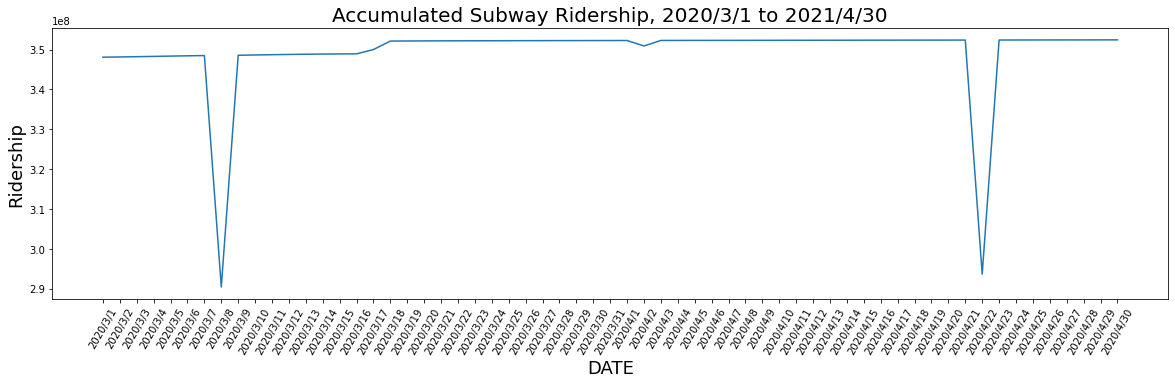

In [16]:
plt.plot(range(len(dict20_03_04_ab)), dict20_03_04_ab.values())
new_xticks = []
for date in dict20_03_04_ab.keys():
    date_str_list = [str(i) for i in date]
    new_xtick = '/'.join(date_str_list)
    new_xticks.append(new_xtick)
plt.xticks(range(len(dict20_03_04_ab)), new_xticks, rotation=60)
plt.rcParams['figure.figsize'] = [20, 5]
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Ridership', fontsize=18)
plt.title('Accumulated Subway Ridership, 2020/3/1 to 2021/4/30', fontsize=20)
plt.show()

In [8]:
dictdaily = {}
for day in range(9, 32):
    dictdaily[(2020, 3, day)] = (dict20_03_04_ab[(2020, 3, day)] - dict20_03_04_ab[(2020, 3, day-1)])/6
for day in range(1, 25):
    if day-1 < 1:
        dictdaily[(2020, 4, day)] = (dict20_03_04_ab[(2020, 4, day)] - dict20_03_04_ab[(2020, 3, 31+day-1)])/6
    else:
        dictdaily[(2020, 4, day)] = (dict20_03_04_ab[(2020, 4, day)] - dict20_03_04_ab[(2020, 4, day-1)])/6
# cur_sum1, cur_sum2 = 0, 0
# tmp_table = pq.read_table(filename, filters=[("DATE", "=", date(2020, 3, 10)), ("STATION", "=", "59 ST"), ("C/A", "=", "A002")])
# for entry in tmp_table.column("ENTRIES"):
#     cur_sum1 += entry.as_py()
# tmp_table = pq.read_table(filename, filters=[("DATE", "=", date(2020, 3, 11)), ("STATION", "=", "59 ST"), ("C/A", "=", "A002")])
# for entry in tmp_table.column("ENTRIES"):
#     cur_sum2 += entry.as_py()
# cur_sum2-cur_sum1

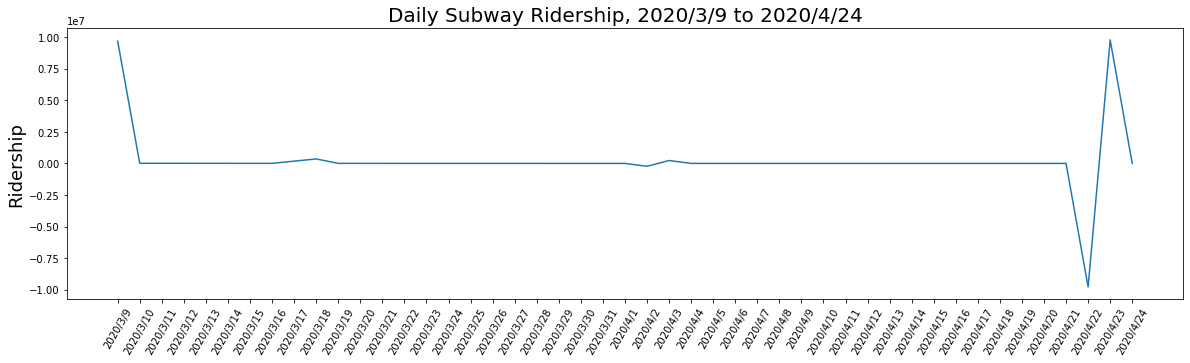

In [9]:
plt.plot(range(len(dictdaily)), dictdaily.values())
new_xticks = []
for date in dictdaily.keys():
    date_str_list = [str(i) for i in date]
    new_xtick = '/'.join(date_str_list)
    new_xticks.append(new_xtick)
plt.xticks(range(len(dictdaily)), new_xticks, rotation=60)
plt.ylabel('Ridership', fontsize=18)
plt.title('Daily Subway Ridership, 2020/3/9 to 2020/4/24', fontsize=20)
plt.show()

In [10]:
lis = [(2020, 3, day) for day in range(9, 32)] + [(2020, 4, day) for day in range(1, 25)]
for i in lis:
    if abs(dictdaily[i]) > 50000:
        del dictdaily[i]

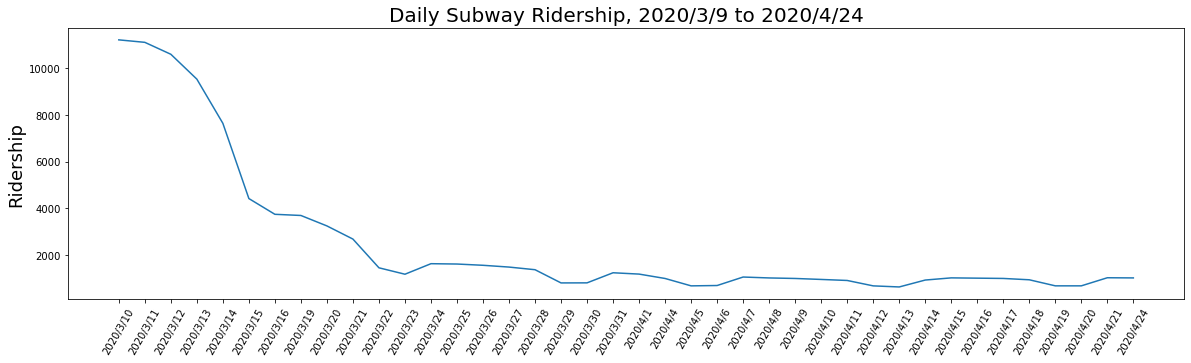

In [11]:
plt.plot(range(len(dictdaily)), dictdaily.values())
new_xticks = []
for date in dictdaily.keys():
    date_str_list = [str(i) for i in date]
    new_xtick = '/'.join(date_str_list)
    new_xticks.append(new_xtick)
plt.xticks(range(len(dictdaily)), new_xticks, rotation=60)
plt.ylabel('Ridership', fontsize=18)
plt.title('Daily Subway Ridership, 2020/3/9 to 2020/4/24', fontsize=20)
plt.show()

In [12]:
dictdaily = {}
for day in range(2, 32):
    dictdaily[(2020, 3, day)] = (dict20_03_04_ab[(2020, 3, day)] - dict20_03_04_ab[(2020, 3, day-1)])/6
for day in range(1, 25):
    if day-1 < 1:
        dictdaily[(2020, 4, day)] = (dict20_03_04_ab[(2020, 4, day)] - dict20_03_04_ab[(2020, 3, 31+day-1)])/6
    else:
        dictdaily[(2020, 4, day)] = (dict20_03_04_ab[(2020, 4, day)] - dict20_03_04_ab[(2020, 4, day-1)])/6
lis = [(2020, 3, day) for day in range(2, 32)] + [(2020, 4, day) for day in range(1, 25)]
for i in lis:
    if abs(dictdaily[i]) > 50000:
        del dictdaily[i]

dictavg = {}
for day in range(9, 32):
    i, cnt, tmp = 0, 0, 0
    while i < 7:
        if (2020, 3, day - i) in dictdaily:
            tmp += dictdaily[(2020, 3, day - i)]
            cnt += 1
        i += 1
    dictavg[(2020, 3, day)] = tmp / cnt
for day in range(1, 25):
    i, cnt, tmp = 0, 0, 0
    while i < 7:
        if day - i < 1:
            if (2020, 3, 31 + day - i) in dictdaily:
                tmp += dictdaily[(2020, 3, 31 + day - i)]
                cnt += 1
        else:
            if (2020, 4, day - i) in dictdaily:
                tmp += dictdaily[(2020, 4, day - i)]
                cnt += 1
        i += 1
    dictavg[(2020, 4, day)] = tmp / cnt

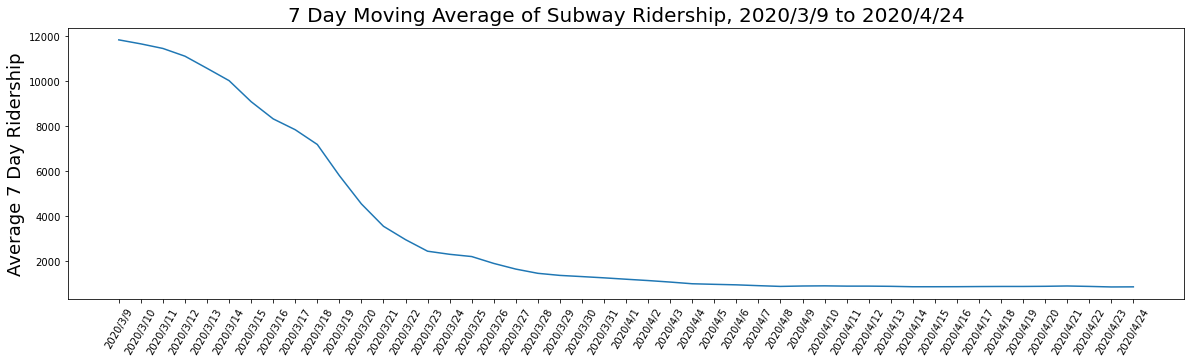

In [13]:
plt.plot(range(len(dictavg)), dictavg.values())
new_xticks = []
for date in dictavg.keys():
    date_str_list = [str(i) for i in date]
    new_xtick = '/'.join(date_str_list)
    new_xticks.append(new_xtick)
plt.xticks(range(len(dictavg)), new_xticks, rotation=60)
plt.ylabel('Average 7 Day Ridership', fontsize=18)
plt.title('7 Day Moving Average of Subway Ridership, 2020/3/9 to 2020/4/24', fontsize=20)
plt.show()

In [14]:
dictavg_percent = {}
prev = dictavg[(2020, 3, 9)]
for key, value in dictavg.items():
    dictavg_percent[key] = ((dictavg[key] - prev) / prev) * 100
    prev = dictavg[key]
del dictavg_percent[(2020, 3, 9)]

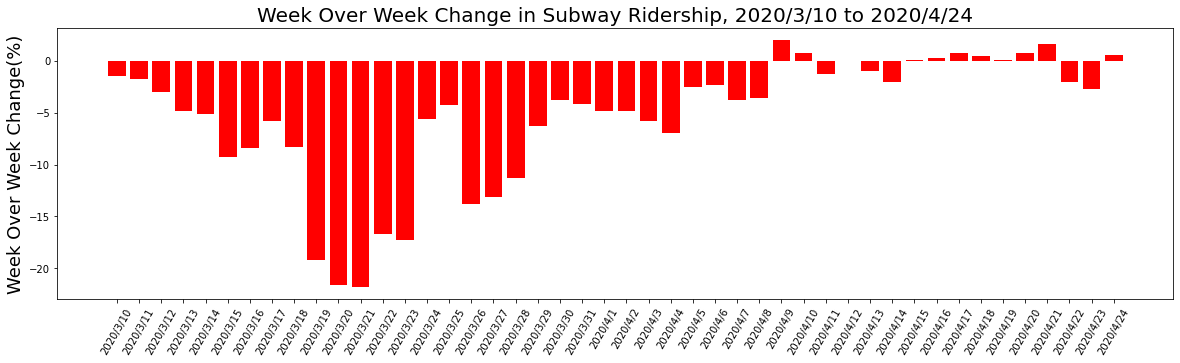

In [15]:
plt.bar(range(len(dictavg_percent)), dictavg_percent.values(), color='r')
new_xticks = []
for date in dictavg_percent.keys():
    date_str_list = [str(i) for i in date]
    new_xtick = '/'.join(date_str_list)
    new_xticks.append(new_xtick)
plt.xticks(range(len(dictavg_percent)), new_xticks, rotation=60)
plt.ylabel('Week Over Week Change(%)', fontsize=18)
plt.title('Week Over Week Change in Subway Ridership, 2020/3/10 to 2020/4/24', fontsize=20)
plt.show()